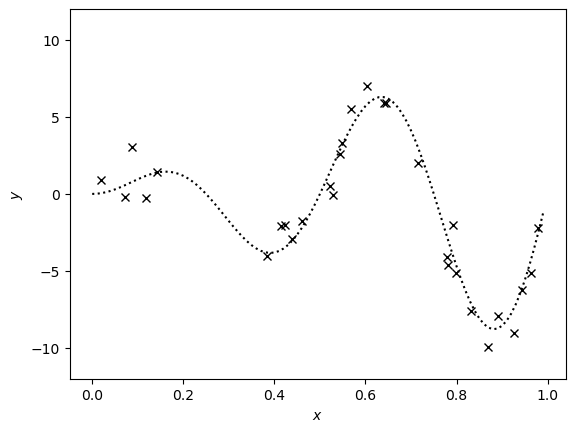

In [40]:
# 人工データセットの可視化
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
X_star = np.arange(0, 1, 0.01)
n_points = 30
f = lambda x: 10 * x * np.sin(4 * np.pi * x)
X = np.sort(np.random.random(size = n_points))
r = f(X) + np.random.normal(0, 1, size = n_points)
plt.ylim(-12, 12)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(X_star, f(X_star), color = "black", linestyle = "dotted")
plt.plot(X, r, "x", color = "black")
plt.show()

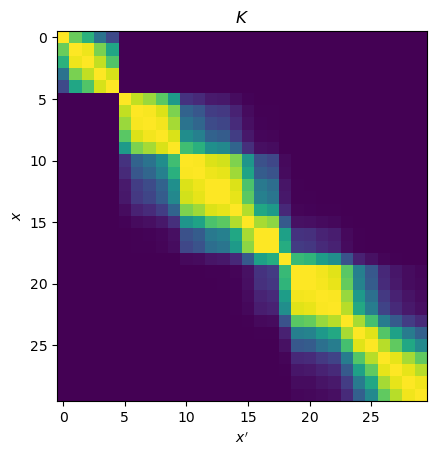

In [41]:
# カーネル行列Kの可視化
def gaussian_kernel(x1, x2, gamma = 100):
    return np.exp(-gamma * (x1 - x2) ** 2)

K = np.zeros((len(X), len(X)))
for i, xi in enumerate(X):
    for j, xj in enumerate(X):
        K[i, j] = gaussian_kernel(xi, xj)

plt.xlabel(r'$x^{\prime}$')
plt.ylabel(r'$x$')
plt.title(r'$K$')
plt.imshow(K)
plt.show()

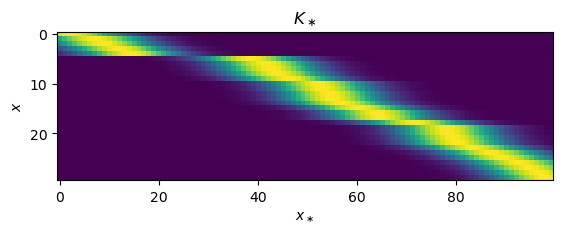

In [42]:
# カーネル行列K_starの可視化
K_star = np.zeros((len(X), len(X_star)))
for i, xi in enumerate(X):
    for j, xj_star in enumerate(X_star):
        K_star[i, j] = gaussian_kernel(xi, xj_star)

plt.xlabel(r'$x_\ast$')
plt.ylabel(r'$x$')
plt.title(r'$K_\ast$')
plt.imshow(K_star)
plt.show()

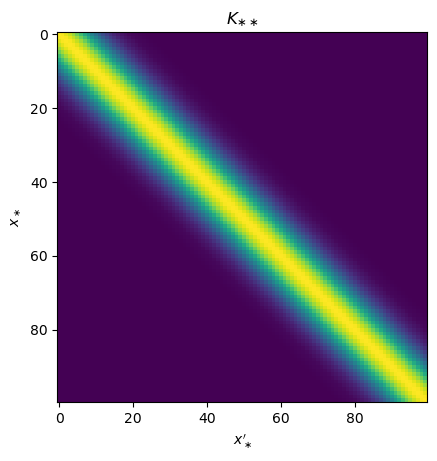

In [43]:
# カーネル行列K_starstarの可視化
K_starstar = np.zeros((len(X_star), len(X_star)))
for i, xi_star in enumerate(X_star):
    for j, xj_star in enumerate(X_star):
        K_starstar[i, j] = gaussian_kernel(xi_star, xj_star)

plt.xlabel(r'$x_\ast^{\prime}$')
plt.ylabel(r'$x_\ast$')
plt.title(r'$K_{\ast\ast}$')
plt.imshow(K_starstar)
plt.show()

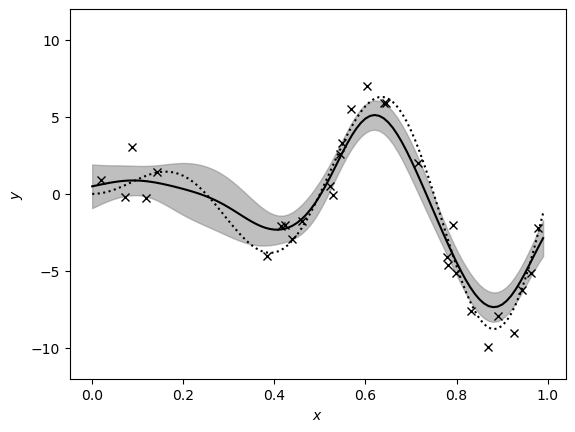

In [44]:
# 人工データセットに対するガウス過程回帰の結果
s = 1
A = np.linalg.inv(K + s * np.eye(K.shape[0]))
mu = np.dot(np.dot(K_star.T, A), r)
sigma = K_starstar - np.dot(np.dot(K_star.T, A), K_star)
plt.ylim(-12, 12)
plt.plot(X_star, f(X_star), color = "black", linestyle = "dotted")
plt.fill_between(X_star, mu - 2 * np.sqrt(np.diag(sigma)), mu + 2 * np.sqrt(np.diag(sigma)), alpha = 0.5, color = "gray")
plt.plot(X_star, mu, color = "black")
plt.plot(X, r, "x", color = "black")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

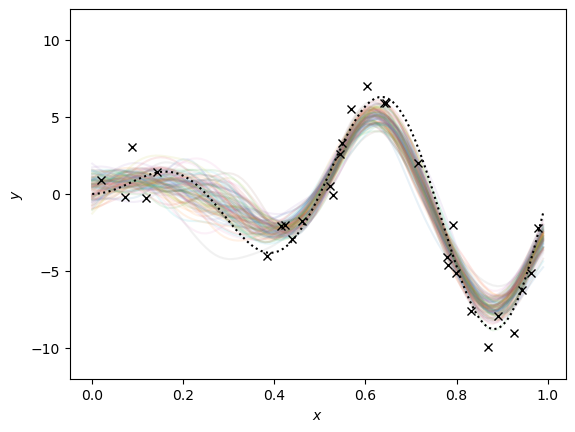

In [45]:
# 多次元正規分布から100回回帰曲線をサンプル
plt.ylim(-12, 12)
for _ in range(100):
    plt.plot(X_star, np.random.multivariate_normal(mu, sigma), alpha = 0.1)
plt.plot(X_star, f(X_star), color = "black", linestyle = "dotted")
plt.plot(X, r, "x", color = "black")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

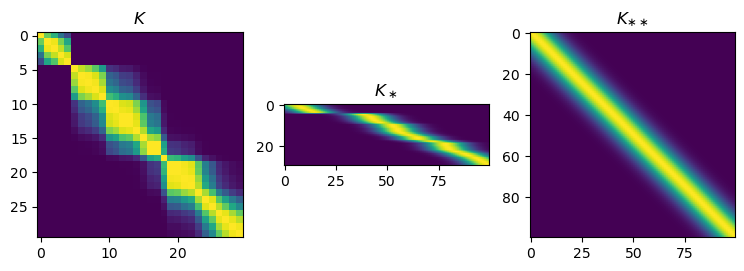

In [46]:
# カーネル行列の高速化
gamma = 100
X = np.expand_dims(X, 0)
X_star = np.expand_dims(X_star, 0)
Q = np.dot(X.T, X)
Q_star = np.dot(X.T, X_star)
Q_starstar = np.dot(X_star.T, X_star)

K = np.exp(-gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
K_star = np.exp(-gamma * (np.tile(np.diag(Q), (X_star.shape[1], 1)).T - 2 * Q_star + np.tile(np.diag(Q_starstar), (X.shape[1], 1))))
K_starstar = np.exp(-gamma * (np.tile(np.diag(Q_starstar), (X_star.shape[1], 1)).T
                              - 2 * Q_starstar + np.tile(np.diag(Q_starstar), (X_star.shape[1], 1))))

plt.figure(figsize = (9, 3))
plt.subplot(1, 3, 1)
plt.title(r'$K$')
plt.imshow(K)

plt.subplot(1, 3, 2)
plt.title(r'$K_\ast$')
plt.imshow(K_star)

plt.subplot(1, 3, 3)
plt.title(r'$K_{\ast\ast}$')
plt.imshow(K_starstar)

plt.show()